**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ matplotlib 3.0.2
+ sklearn 0.20.2

# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

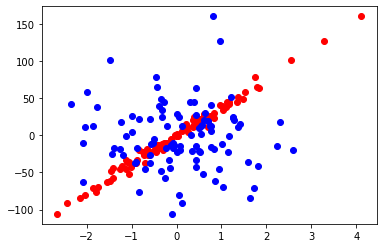

In [8]:
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')

In [9]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [10]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [11]:
print(test_labels)

[  14.76930132  -80.80239408  -22.33224966   13.31981235    4.45578287
   41.1068411    24.47584129  101.14760598   11.96165156   12.74038341
  -12.98848753    1.72644759   18.17188553  -57.46293828   64.70214251
  -15.01435792  -22.32195021   11.74073026  -16.65927231  -61.47026695
   -1.42235396   12.42286854   22.2276832   -19.36956003   -4.38652971
   34.35183007   28.15553021  -26.87743177  -36.69728864 -105.77758163]


In [12]:
print(predictions)

[   7.40803472  -78.24288931  -29.2113105    13.85449488    8.55380363
   35.89005614   22.3803455    95.42905036   13.28947931    6.71321671
  -16.79330083   -0.64420589   17.81048141  -54.76302768   67.03778913
  -10.26133724  -22.96259252   13.69968286  -14.97353829  -56.79292055
   -1.14835107    6.2052277    17.91246264  -32.2674146    -5.35192491
   38.24975904   21.99195681  -28.3334272   -27.67061761 -101.78522584]


In [13]:
metrics.mean_absolute_error(test_labels, predictions)

3.8771043033209365

In [14]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, std: 1.07371044928902


In [15]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [16]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [17]:
coef

array([38.07925837,  0.        ])

In [18]:
linear_regressor.coef_

array([37.94697934,  0.35117406])

In [19]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.835036464227756

In [20]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [21]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 37.95*x1 + 0.35*x2 + -0.84


#### Lasso

In [22]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [23]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [24]:
print(lasso_regressor.coef_)

[37.20890103  0.        ]


In [25]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [26]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.21*x1 + 0.00*x2
